This tutorial is a `Python` version of the code presented in the `r` screen cast, TidyX.

To watch the screen cast: https://www.youtube.com/watch?v=WBNaGw7GxxM

To access the R code: https://github.com/thebioengineer/TidyX/blob/master/TidyTuesday_Explained/099-Simulating_Data-Bayes_Intro/Episode%2099%20-%20Intro%20to%20Bayes.Rmd

In [ ]:
## Libraries
import numpy as np
import pandas as pd
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt

### Example 1: Am I sick

You feel ill and go to the doctor. The doctor suspects you have a very rare, but deadly, illness and gives you a test that she says is able to correctly identify 95% of the people that are positive for the illness. Additionally, she informs you that the test is successful at identifying 95% of those that are negative for the disease. The former is referred to as **sensitivity** while the latter is referred to as **specificity**.

The doctor returns the test and tells you that you are positive for the illness!! How probable is it that you have this particular illness?

Unfortunately, neither sensitivity or specificity tell us what we really want to know, p(Illness | Positive Test). Moreover, to apply **Bayes Theorem** we will need to have some prior knowledge of the illness (the base rate). In this case, only 5% of the population ever get this particularly rare, but deadly, illness.


Let's write out all of the known information:

* p(+ Test | Illness) = 0.95
* p(+Test | No Illness) = 0.05         (1 - 0.95 --> False Positive)
* p(- Test | No Illness) = 0.95
* p(- Test | Illness) = 0.05           (1 - 0.95 --> False negative)
* p(Illness) = 0.05                    (The current infection rate)
* p(No Illness) = 0.95                 (1 - 0.05 --> The complement of p(Illness))

Now we can apply these values in Bayes Theorem to find the probability of illness given a positive test.

$p(Illness | +) = (p(+ | Illness) * p(Illness)) / (p(+ | Illness) * p(Illness) + p(+ | No.Illness) * p(No.Illness))$

In [2]:
## Write out all of the probabilities
p_positive_illness = 0.95
p_positive_no_illness = 1 - p_positive_illness

p_negative_no_illness = 0.95
p_negative_illness = 1 - p_negative_no_illness

p_illness = 0.05
p_no_illness = 1 - p_illness

In [4]:
## Apply Bayes Theorem
p_illness_positive = (p_positive_illness * p_illness) / (p_positive_illness * p_illness + p_positive_no_illness * p_no_illness)

p_illness_positive

0.4999999999999998

* Only a 50% chance (not a 95% chance) that you have the illness. Hopefully the doctor sends you out for additional testing to confirm! Following the additional testing, the posterior of 50% is now the prior and the same sensitivity and specificity values can be used if the same test is redone or new sensitivity and specificty values can be used if a new (maybe more precise) test is used.

### Example 2: Flipping Coins

We have a coin and flip it 10 times and observe 3 heads

* What is the probability that the coin is weighted towards heads?
* We start with a flat prior, assigning equal weights across the entire probability range
* Bayes Theorem:

$p(Fair | 3 heads) = (p(3 heads | Fair) * p(Fair)) / (p(3 heads))$

* Because flipping coins has only 2 outcomes, it represents a Bernoulli trial and thus we use the binomial distribution to represent our likelihood.


In [5]:
## create a probility grid

p_grid = np.linspace(start = 0, stop = 1, num = 11)

In [6]:
## prior

prior = np.repeat(a = 0.1, repeats = 11)

In [7]:
## put everything in a data frame

coin = pd.DataFrame({'p_grid': p_grid, 
                     'prior': prior})
coin

,p_grid,prior
0,0.0,0.1
1,0.1,0.1
2,0.2,0.1
3,0.3,0.1
4,0.4,0.1
5,0.5,0.1
6,0.6,0.1
7,0.7,0.1
8,0.8,0.1
9,0.9,0.1


In [8]:
## likelihood
success = 3
trials = 10

coin['likelihood'] = binom.pmf(success, trials, coin['p_grid'])
coin

,p_grid,prior,likelihood
0,0.0,0.1,0.000000
1,0.1,0.1,0.057396
2,0.2,0.1,0.201327
3,0.3,0.1,0.266828
4,0.4,0.1,0.214991
5,0.5,0.1,0.117188
6,0.6,0.1,0.042467
7,0.7,0.1,0.009002
8,0.8,0.1,0.000786
9,0.9,0.1,0.000009


In [9]:
## Unstandardized Posterior
coin['unstd_posterior'] = coin['prior'] * coin['likelihood']

In [10]:
## Standardized posterior
coin['posterior'] = coin['unstd_posterior'] / coin['unstd_posterior'].sum()
coin['posterior'] = coin['posterior'].round(3)

In [11]:
coin

,p_grid,prior,likelihood,unstd_posterior,posterior
0,0.0,0.1,0.000000,0.000000e+00,0.000
1,0.1,0.1,0.057396,5.739563e-03,0.063
2,0.2,0.1,0.201327,2.013266e-02,0.221
3,0.3,0.1,0.266828,2.668279e-02,0.293
4,0.4,0.1,0.214991,2.149908e-02,0.236
5,0.5,0.1,0.117188,1.171875e-02,0.129
6,0.6,0.1,0.042467,4.246733e-03,0.047
7,0.7,0.1,0.009002,9.001692e-04,0.010
8,0.8,0.1,0.000786,7.864320e-05,0.001
9,0.9,0.1,0.000009,8.748000e-07,0.000


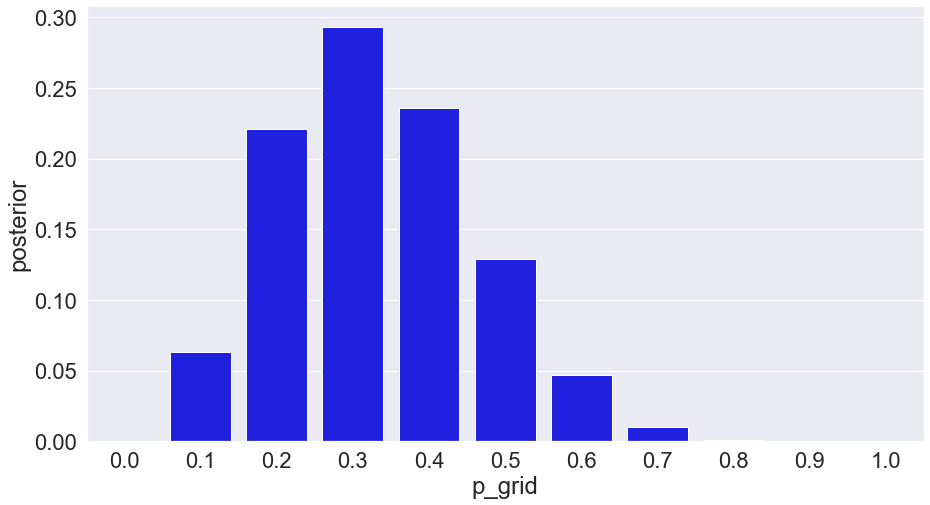

In [14]:
## plot results
plt.figure(figsize = (15,8))
sns.set(font_scale = 2)
p = sns.barplot(x = coin['p_grid'].round(2), y = coin['posterior'], color = 'blue')

**The posterior becomes the new prior.**

* We make 10 more flips and now observe 6 out of 10 heads

In [16]:
## probability grid
p_grid = np.linspace(start = 0, stop = 1, num = 11)

In [17]:
# prior
prior = coin['posterior']

In [18]:
## put everything in a data frame
coin_2nd_flip = pd.DataFrame({'p_grid': p_grid, 
                              'prior': prior})
coin_2nd_flip 

,p_grid,prior
0,0.0,0.000
1,0.1,0.063
2,0.2,0.221
3,0.3,0.293
4,0.4,0.236
5,0.5,0.129
6,0.6,0.047
7,0.7,0.010
8,0.8,0.001
9,0.9,0.000


In [19]:
## likelihood
success = 6
trials = 10

coin_2nd_flip['likelihood'] = binom.pmf(success, trials, coin_2nd_flip['p_grid'])
coin_2nd_flip

,p_grid,prior,likelihood
0,0.0,0.000,0.000000
1,0.1,0.063,0.000138
2,0.2,0.221,0.005505
3,0.3,0.293,0.036757
4,0.4,0.236,0.111477
5,0.5,0.129,0.205078
6,0.6,0.047,0.250823
7,0.7,0.010,0.200121
8,0.8,0.001,0.088080
9,0.9,0.000,0.011160


In [21]:
## Unstandardized Posterior
coin_2nd_flip['unstd_posterior'] = coin_2nd_flip['prior'] * coin_2nd_flip['likelihood']

In [24]:
## Standardized posterior
coin_2nd_flip['posterior'] = coin_2nd_flip['unstd_posterior'] / coin_2nd_flip['unstd_posterior'].sum()
coin_2nd_flip['posterior'] = coin_2nd_flip['posterior'].round(3)

In [25]:
coin_2nd_flip

,p_grid,prior,likelihood,unstd_posterior,posterior
0,0.0,0.000,0.000000,0.000000,0.000
1,0.1,0.063,0.000138,0.000009,0.000
2,0.2,0.221,0.005505,0.001217,0.015
3,0.3,0.293,0.036757,0.010770,0.137
4,0.4,0.236,0.111477,0.026309,0.335
5,0.5,0.129,0.205078,0.026455,0.336
6,0.6,0.047,0.250823,0.011789,0.150
7,0.7,0.010,0.200121,0.002001,0.025
8,0.8,0.001,0.088080,0.000088,0.001
9,0.9,0.000,0.011160,0.000000,0.000


Text(0.5, 1.0, 'Posterior')

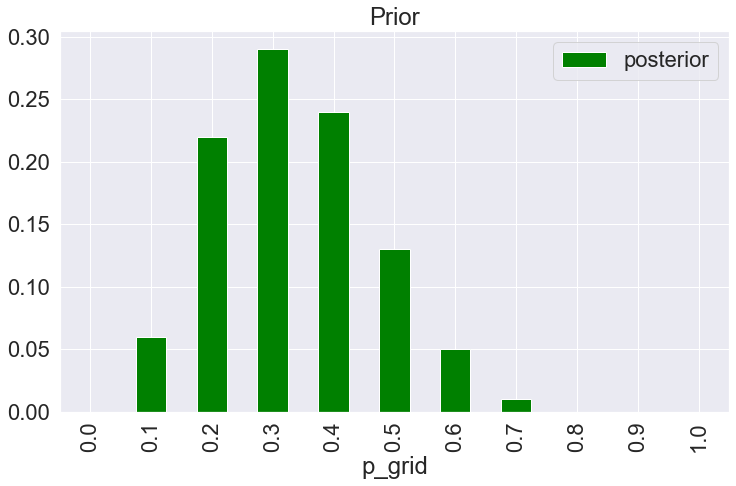

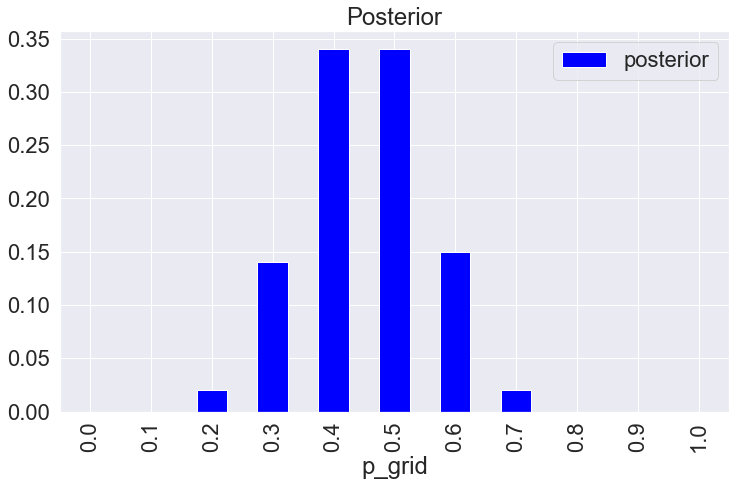

In [56]:
coin[['p_grid', 'posterior']].round(2).plot.bar(x='p_grid', subplots=True, color = 'green', figsize=(12,7))
plt.title('Prior')
coin_2nd_flip[['p_grid', 'posterior']].round(2).plot.bar(x='p_grid', subplots=True, color = "blue", figsize=(12,7))
plt.title('Posterior')